In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
cars2010 = pd.read_csv('data/FuelEconomy/cars2010.csv', index_col=0)
cars2011 = pd.read_csv('data/FuelEconomy/cars2011.csv', index_col=0)
cars2012 = pd.read_csv('data/FuelEconomy/cars2012.csv', index_col=0)

In [3]:
cars2010.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
1088,4.7,8,AM6,28.0198,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
1089,4.7,8,M6,25.6094,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
1090,4.2,8,M6,26.8000,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
1091,4.2,8,AM6,25.0451,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
1092,5.2,10,AM6,24.8000,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0


In [4]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Linear Regression

In [5]:
reg = LinearRegression()
reg.fit(cars2010[['EngDispl']], cars2010['FE'])
print(f"Least square estimate: intercept = {reg.intercept_}, coefficient ={reg.coef_[0]}")

Least square estimate: intercept = 50.56322991169735, coefficient =-4.5209292791740205


In [6]:
scores = np.sqrt(np.abs(cross_val_score(reg, cars2010[['EngDispl']], cars2010['FE'], cv=10, scoring='neg_mean_squared_error')))
print(f'RMSE: {np.mean(scores):.3f}')

RMSE: 4.728


In [7]:
X = np.linspace(np.min(cars2010[['EngDispl']]), np.max(cars2010[['EngDispl']]), num=1_000)
y = reg.predict(X)

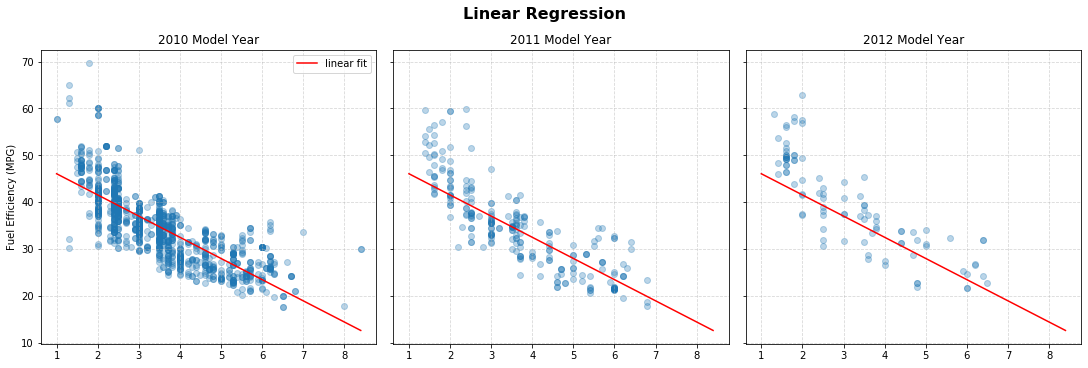

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharey=True, sharex=True)
fig.suptitle('Linear Regression', fontsize=16, weight='bold')

ax = axes[0]
ax.scatter(cars2010['EngDispl'], cars2010['FE'], alpha=0.3)
ax.plot(X, y, 'r', label='linear fit')
ax.set_title('2010 Model Year')
ax.set_ylabel('Fuel Efficiency (MPG)')
ax.legend(loc='upper right')

ax = axes[1]
ax.scatter(cars2011['EngDispl'], cars2011['FE'], alpha=0.3)
ax.plot(X, y, 'r')
ax.set_title('2011 Model Year')

ax = axes[2]
ax.scatter(cars2012['EngDispl'], cars2012['FE'], alpha=0.3)
ax.plot(X, y, 'r')
ax.set_title('2012 Model Year')


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

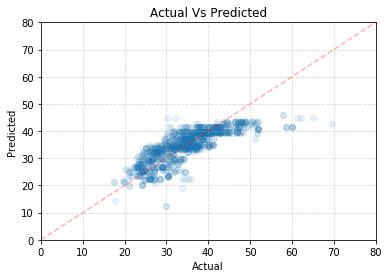

In [9]:
fig, ax = plt.subplots()

ax.scatter(cars2010['FE'], reg.predict(cars2010[['EngDispl']]), alpha=0.1)
ax.set_title('Actual Vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.grid(True, linestyle='--', alpha=0.5)

z = np.linspace(0, 80, 80)
ax.plot(z, z, 'r', linestyle='--', alpha=0.3)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

plt.show()

### Quadratic Regression

In [10]:
quad = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
quad.fit(cars2010[['EngDispl']], cars2010['FE'])
print(f"Least square estimate: intercept = {quad['linearregression'].intercept_:.3f}, coefficient ={quad['linearregression'].coef_}")

Least square estimate: intercept = 63.233, coefficient =[-11.8673817    0.93510159]


In [11]:
scores = np.sqrt(np.abs(cross_val_score(quad, cars2010[['EngDispl']], cars2010['FE'], cv=10, scoring='neg_mean_squared_error')))
print(f'RMSE: {np.mean(scores):.3f}')

RMSE: 4.345


In [12]:
y_poly = quad.predict(X)

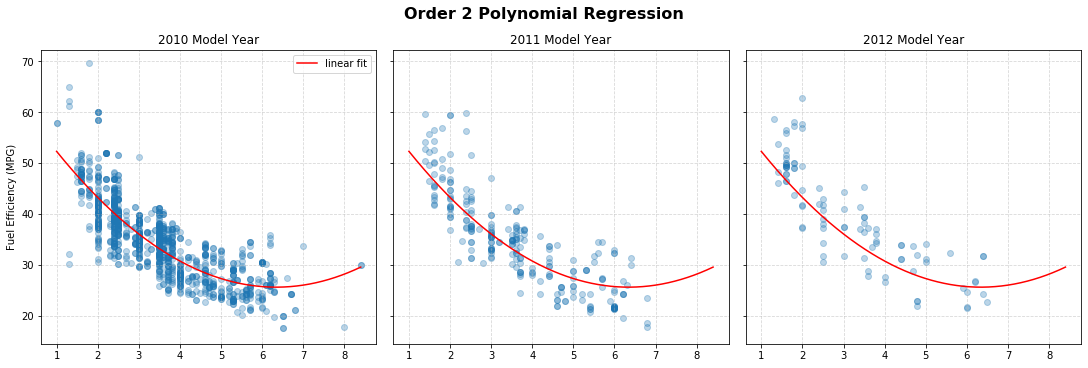

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharey=True, sharex=True)
fig.suptitle('Order 2 Polynomial Regression', fontsize=16, weight='bold')

ax = axes[0]
ax.scatter(cars2010['EngDispl'], cars2010['FE'], alpha=0.3)
ax.plot(X, y_poly, 'r', label='linear fit')
ax.set_title('2010 Model Year')
ax.set_ylabel('Fuel Efficiency (MPG)')
ax.legend(loc='upper right')

ax = axes[1]
ax.scatter(cars2011['EngDispl'], cars2011['FE'], alpha=0.3)
ax.plot(X, y_poly, 'r')
ax.set_title('2011 Model Year')

ax = axes[2]
ax.scatter(cars2012['EngDispl'], cars2012['FE'], alpha=0.3)
ax.plot(X, y_poly, 'r')
ax.set_title('2012 Model Year')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

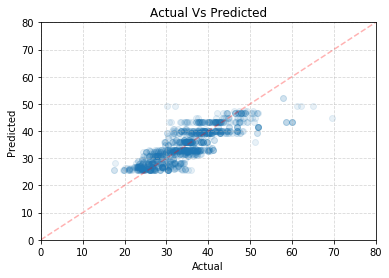

In [14]:
fig, ax = plt.subplots()

ax.scatter(cars2010['FE'], quad.predict(cars2010[['EngDispl']]), alpha=0.1)
ax.set_title('Actual Vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.grid(True, linestyle='--', alpha=0.5)

z = np.linspace(0, 80, 80)
ax.plot(z, z, 'r', linestyle='--', alpha=0.3)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

plt.show()

### Multivariate Adaptive Regression Splines

In [15]:
from pyearth import Earth

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
mars = Earth().fit(cars2010[['EngDispl']], cars2010['FE'])

In [17]:
print(mars.basis_)
print(mars.coef_)

(Intercept)
h(EngDispl-6.7)
h(6.7-EngDispl)
EngDispl

[[50.94282839  9.42649973 -4.6417816 ]]


In [18]:
scores = np.sqrt(np.abs(cross_val_score(mars, cars2010[['EngDispl']], cars2010['FE'], cv=10, scoring='neg_mean_squared_error')))
print(f'RMSE: {np.mean(scores):.3f}')

RMSE: 4.721


In [19]:
y_mars = mars.predict(X)

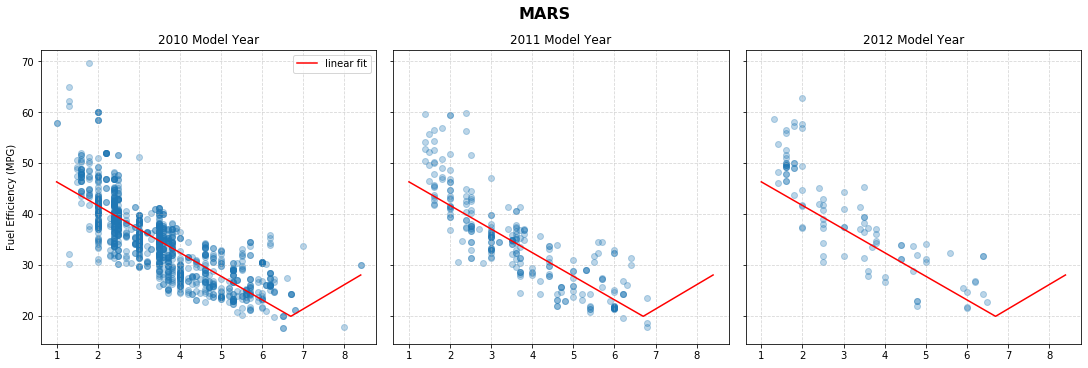

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharey=True, sharex=True)
fig.suptitle('MARS', fontsize=16, weight='bold')

ax = axes[0]
ax.scatter(cars2010['EngDispl'], cars2010['FE'], alpha=0.3)
ax.plot(X, y_mars, 'r', label='linear fit')
ax.set_title('2010 Model Year')
ax.set_ylabel('Fuel Efficiency (MPG)')
ax.legend(loc='upper right')

ax = axes[1]
ax.scatter(cars2011['EngDispl'], cars2011['FE'], alpha=0.3)
ax.plot(X, y_mars, 'r')
ax.set_title('2011 Model Year')

ax = axes[2]
ax.scatter(cars2012['EngDispl'], cars2012['FE'], alpha=0.3)
ax.plot(X, y_mars, 'r')
ax.set_title('2012 Model Year')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

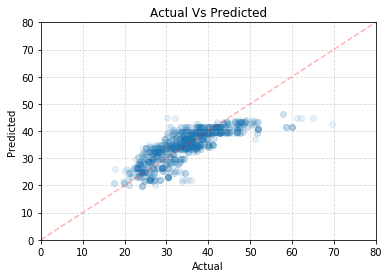

In [21]:
fig, ax = plt.subplots()

ax.scatter(cars2010['FE'], mars.predict(cars2010[['EngDispl']]), alpha=0.1)
ax.set_title('Actual Vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.grid(True, linestyle='--', alpha=0.5)

z = np.linspace(0, 80, 80)
ax.plot(z, z, 'r', linestyle='--', alpha=0.3)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

plt.show()

## Evaluate on 2011 Data

In [22]:
reg_score = np.mean(np.sqrt(np.abs(cross_val_score(reg, cars2011[['EngDispl']], cars2011['FE'], cv=10, scoring='neg_mean_squared_error'))))
quad_score = np.mean(np.sqrt(np.abs(cross_val_score(quad, cars2011[['EngDispl']], cars2011['FE'], cv=10, scoring='neg_mean_squared_error'))))
mars_score = np.mean(np.sqrt(np.abs(cross_val_score(mars, cars2011[['EngDispl']], cars2011['FE'], cv=10, scoring='neg_mean_squared_error'))))

In [23]:
print(f'Linear Regression: {reg_score:.3f},\nQuadratic Regression: {quad_score:.3f},\nMARS: {mars_score:.3f}')

Linear Regression: 5.074,
Quadratic Regression: 4.794,
MARS: 5.088
